# Test FFT properties in torch
x: time domain

u: freq domain

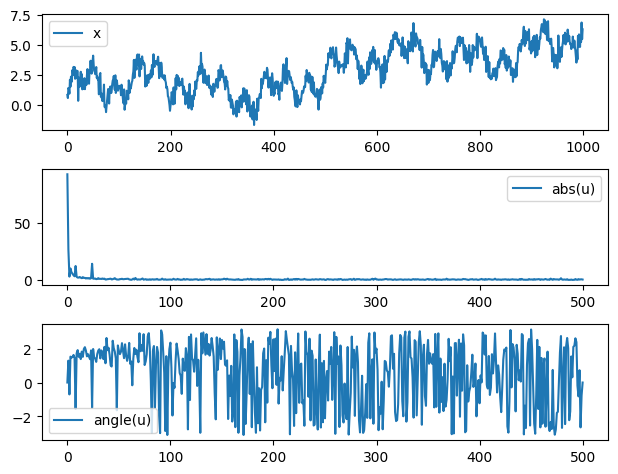

In [1]:
import torch
import matplotlib.pyplot as plt
t = torch.linspace(0, 4*torch.pi, 1000)
x = torch.sin(t) + torch.sin(4*t)  + torch.sin(12*t) + torch.exp(t*0.15) + torch.randn_like(t)*0.5
u = torch.fft.rfft(x, norm='ortho')
fig, axs = plt.subplots(3)
axs[0].plot(x, label='x')
axs[0].legend()
axs[1].plot(u.abs(), label='abs(u)')
axs[1].legend()
axs[2].plot(u.angle(), label='angle(u)')
axs[2].legend()
fig.tight_layout()

## Linear property
$x^\prime = ax \Rightarrow u^\prime = au$

In [2]:
a = torch.randn(1)
b = torch.randn(1).expand_as(x)
# b = torch.randn(1)
x_prime = x*a + b
u_prime = torch.fft.rfft(x_prime, norm='ortho')
# print((u*a + torch.fft.rfft(b, norm='ortho'))[:10])
# print(u_prime[:10])
# print(torch.fft.rfft(b))
assert torch.allclose(u_prime, u*a + torch.fft.rfft(b, norm='ortho'), atol=1e-5, rtol=1e-5)

In [5]:
a = torch.randn(5)
torch.fft.rfft(a).shape

torch.Size([3])